#### 这个数据想要解决的问题
- 主要想知道比如学生的一些特征是怎么影响学生在考试当中的成绩的（就是简单的回归问题）
#### 数据来源
- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- 数据主要有8列，1000个样本构成

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 检查数据的基本情况
- 检查缺失数据
- 检查是否有重复的数据
- 检查数据类型
- 检查每个特征总共有几种可能的取值
- 检查数据集的统计特征
- 检查分类变量的表现

In [3]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

这个数据集并没有缺失值

In [4]:
df.duplicated().sum()

0

没有重复的值

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
print("分类变量'gender':", end=" ")
print(df['gender'].unique())

print("分类变量'race_ethnicity':", end=" ")
print(df['race_ethnicity'].unique())

print("分类变量'parental_level_of_education':", end=" ")
print(df['parental_level_of_education'].unique())

print("分类变量'lunch':", end=" ")
print(df['lunch'].unique())

print("分类变量'test_preparation_course':", end=" ")
print(df['test_preparation_course'].unique())

分类变量'gender': ['female' 'male']
分类变量'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
分类变量'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
分类变量'lunch': ['standard' 'free/reduced']
分类变量'test_preparation_course': ['none' 'completed']


In [8]:
# 分别将分类变量和数值型变量的特征分开
cate_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]

print('分类变量特征为：', cate_features)
print('数值型变量特征有：', num_features)

分类变量特征为： ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
数值型变量特征有： ['math_score', 'reading_score', 'writing_score']


In [9]:
# 添加总成绩和平均成绩
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print(num_features)

['math_score', 'reading_score', 'writing_score', 'total_score', 'average']


In [11]:
math_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
write_full = df[df['writing_score'] == 100]['average'].count()

print(f'总共有{math_full}个人数学满分')
print(f'总共有{reading_full}个人阅读满分')
print(f'总共有{write_full}个人写作满分')

总共有7个人数学满分
总共有17个人阅读满分
总共有14个人写作满分


#### 数据可视化

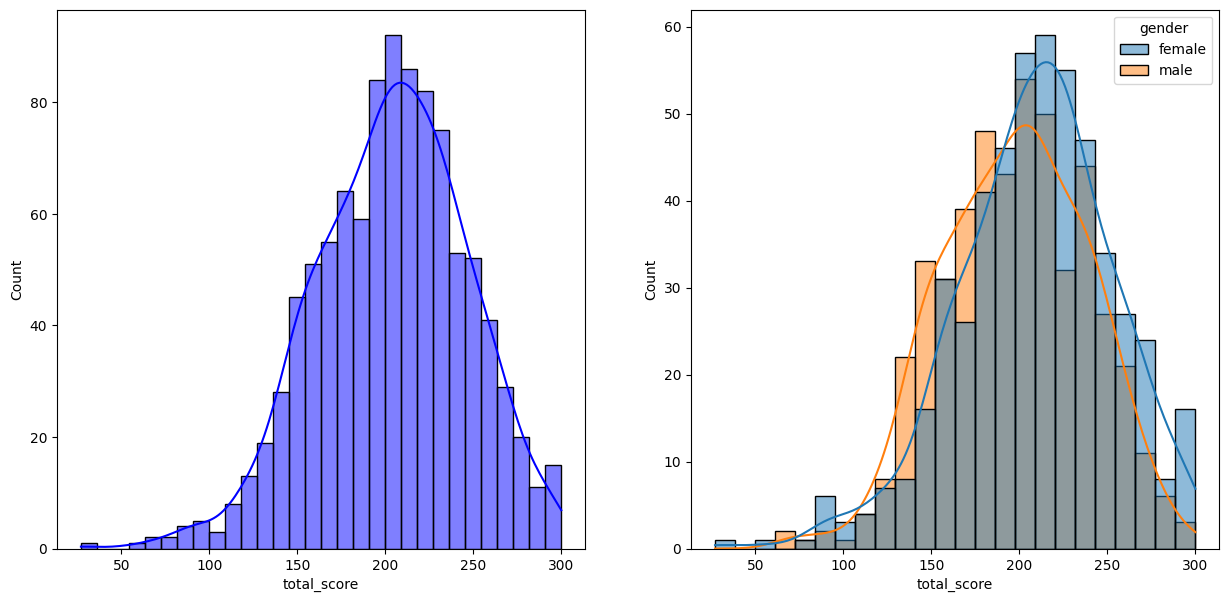

In [16]:
fig,axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

整体分数呈现出左偏分布，其中女性的成绩比男性成绩更好

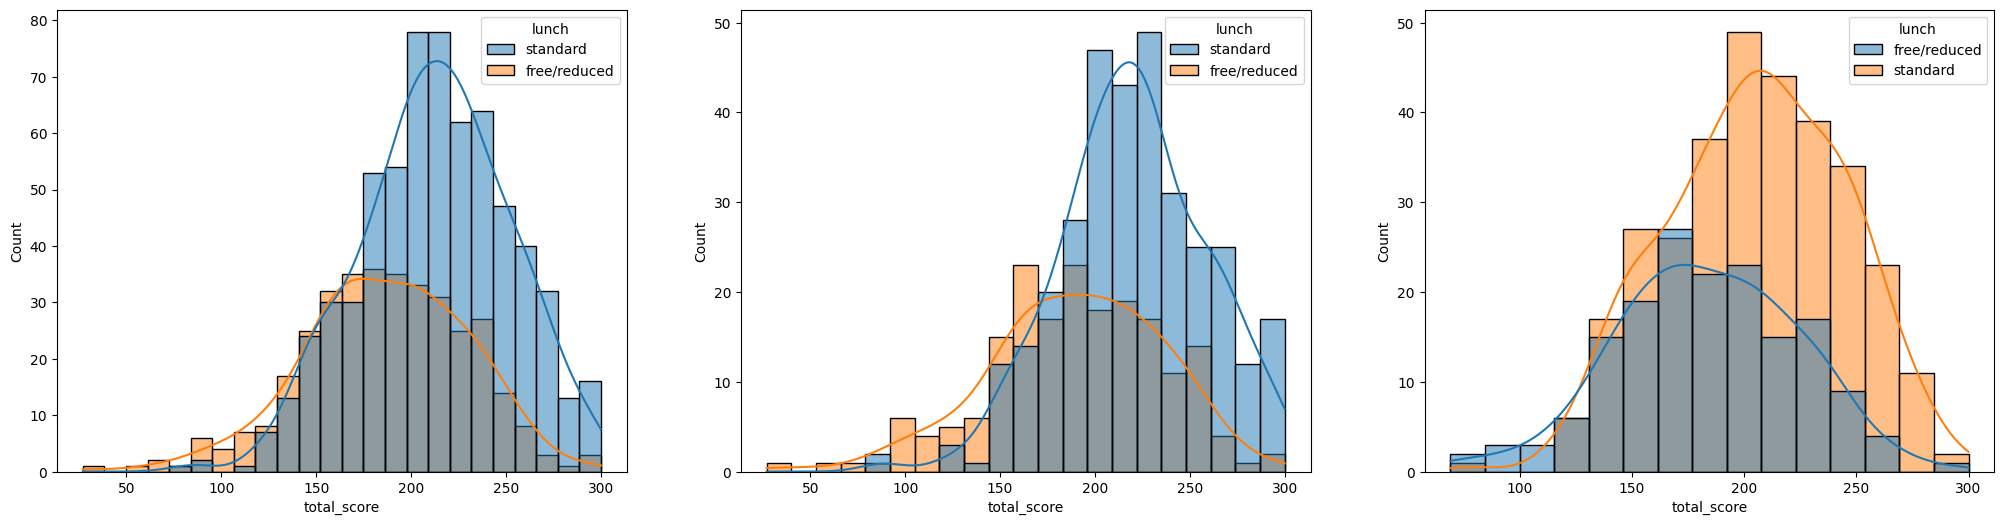

In [19]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='total_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='total_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='total_score', kde=True, hue='lunch')
plt.show()

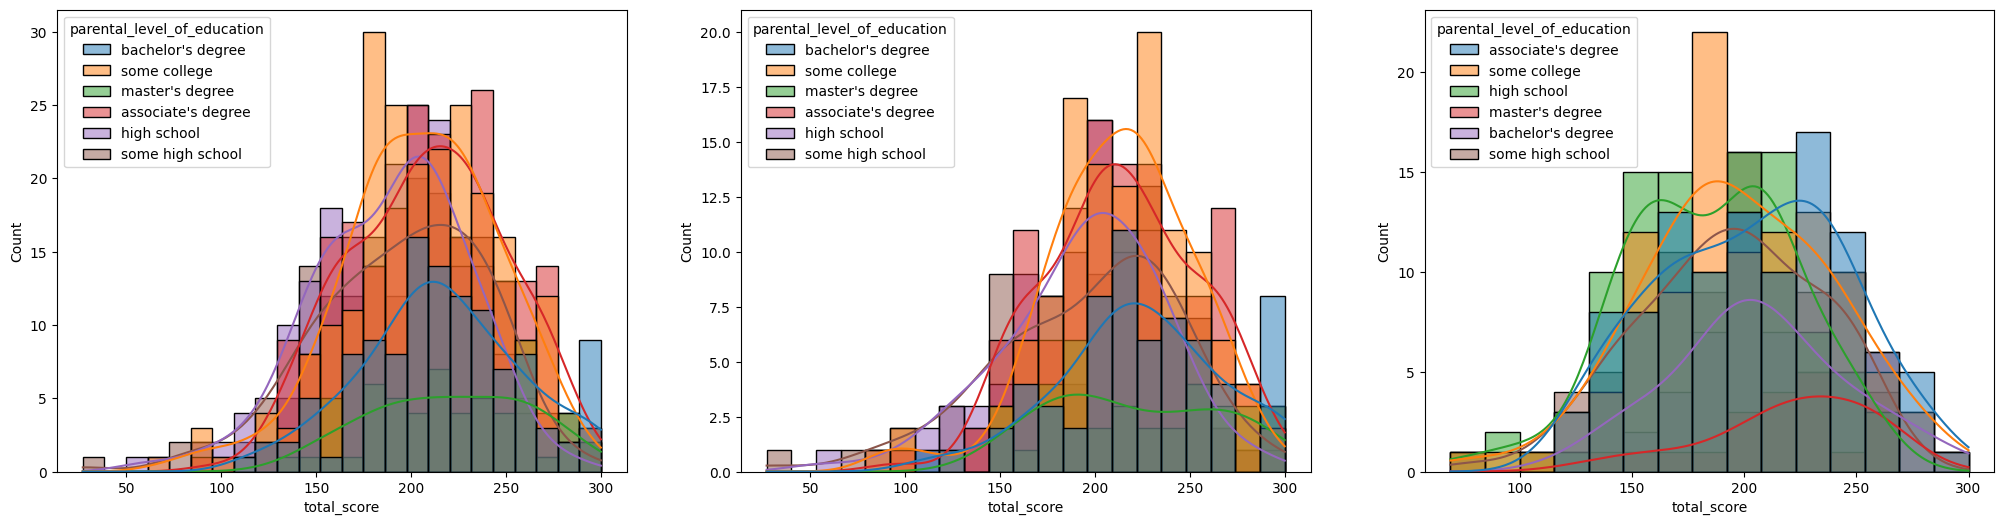

In [20]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='total_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='total_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='total_score', kde=True, hue='parental_level_of_education')
plt.show()

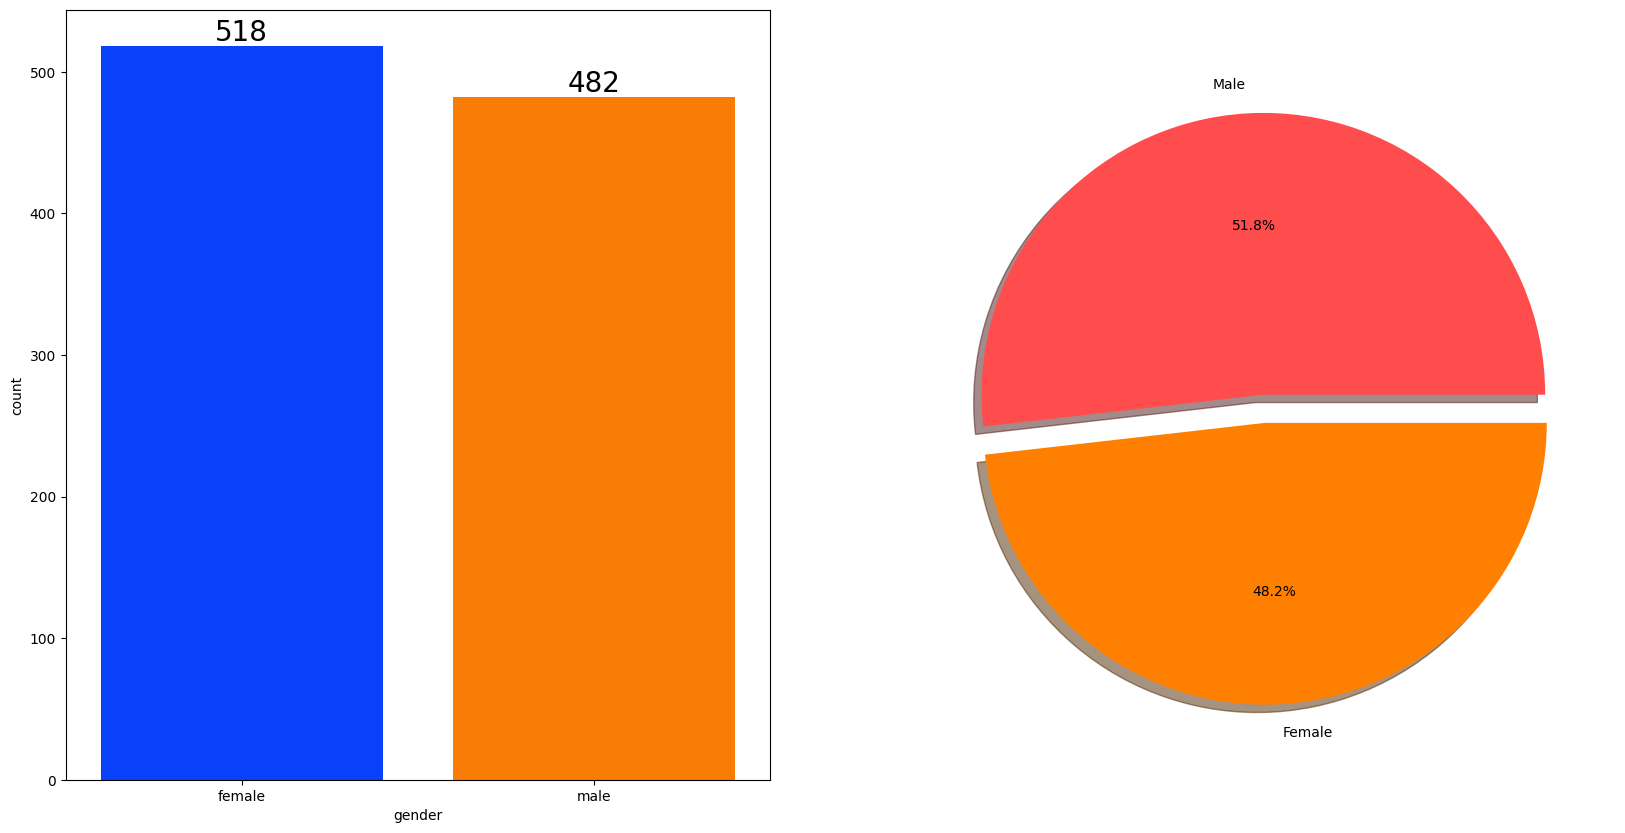

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df.gender, data=df, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df.gender.value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [30]:
gender_group = pd.concat([df['gender'], df[num_features]], axis=1).groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


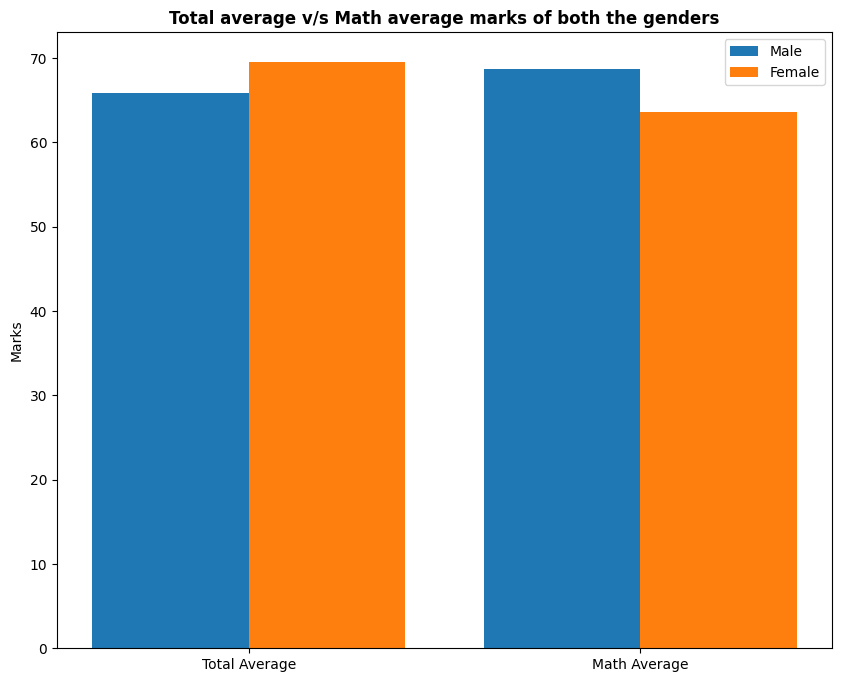

In [33]:
plt.figure(figsize=(10,8))
x = ['Total Average', 'Math Average']

female_score = [gender_group['average'][0], gender_group.math_score[0]]
male_score = [gender_group['average'][1], gender_group.math_score[1]]

X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'Female')
  
plt.xticks(X_axis, x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()